In [4]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

# Load (downloaded if needed) the MNIST dataset
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# Describe the datasets
print("Training data - X_train shape:", X_train.shape, " Y_train shape:", Y_train.shape)
print("Testing data  - X_test shape:", X_test.shape, " Y_test shape:", Y_test.shape)

# Flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

# Normalize inputs from 0-255 to 0-1
X_train = X_train / 255.
X_test = X_test / 255.

# One hot encode outputs
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
num_classes = Y_test.shape[1]

# Define baseline model
model = Sequential()
model.add(Dense(num_pixels, input_dim=num_pixels, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Show model summary
model.summary()

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, batch_size=200, verbose=2)

# Final evaluation of the model
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))


Training data - X_train shape: (60000, 28, 28)  Y_train shape: (60000,)
Testing data  - X_test shape: (10000, 28, 28)  Y_test shape: (10000,)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 784)               615440    
                                                                 
 dense_3 (Dense)             (None, 10)                7850      
                                                                 
Total params: 623290 (2.38 MB)
Trainable params: 623290 (2.38 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
300/300 - 7s - loss: 0.2811 - accuracy: 0.9208 - val_loss: 0.1403 - val_accuracy: 0.9587 - 7s/epoch - 24ms/step
Epoch 2/10
300/300 - 6s - loss: 0.1129 - accuracy: 0.9670 - val_loss: 0.0960 - val_accuracy: 0.9705 - 6s/epoch - 22ms/step
Epoch 3/10
300/300 - 7s - 

# 2nd

In [5]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

# Load (downloaded if needed) the MNIST dataset
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# Flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

# Normalize inputs from 0-255 to 0-1
X_train = X_train / 255.
X_test = X_test / 255.

# One hot encode outputs
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
num_classes = Y_test.shape[1]

# Define baseline model
def create_model():
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model

# Compile model
model = create_model()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Function to train and evaluate model with varying epochs and batch size
def train_and_evaluate(epochs, batch_size):
    model = create_model()
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=epochs, batch_size=batch_size, verbose=0)
    scores = model.evaluate(X_test, Y_test, verbose=0)
    return history, scores

# Varying epochs and batch size
epochs_list = [5, 10, 15, 20, 25]
batch_size_list = [64, 128, 256, 512, 1024]

for epochs in epochs_list:
    for batch_size in batch_size_list:
        print(f"\nTraining with {epochs} epochs and {batch_size} batch size:")
        history, scores = train_and_evaluate(epochs, batch_size)
        print("Test Accuracy: %.2f%%" % (scores[1]*100))



Training with 5 epochs and 64 batch size:
Test Accuracy: 97.82%

Training with 5 epochs and 128 batch size:
Test Accuracy: 97.88%

Training with 5 epochs and 256 batch size:
Test Accuracy: 97.75%

Training with 5 epochs and 512 batch size:
Test Accuracy: 97.64%

Training with 5 epochs and 1024 batch size:
Test Accuracy: 97.03%

Training with 10 epochs and 64 batch size:
Test Accuracy: 98.20%

Training with 10 epochs and 128 batch size:
Test Accuracy: 98.18%

Training with 10 epochs and 256 batch size:
Test Accuracy: 98.06%

Training with 10 epochs and 512 batch size:
Test Accuracy: 97.97%

Training with 10 epochs and 1024 batch size:
Test Accuracy: 97.75%

Training with 15 epochs and 64 batch size:
Test Accuracy: 98.10%

Training with 15 epochs and 128 batch size:
Test Accuracy: 98.04%

Training with 15 epochs and 256 batch size:
Test Accuracy: 98.44%

Training with 15 epochs and 512 batch size:
Test Accuracy: 98.15%

Training with 15 epochs and 1024 batch size:
Test Accuracy: 98.02%


# 3

In [6]:
# Define model with additional hidden layers
def create_deep_model():
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, activation='relu'))
    model.add(Dense(512, activation='relu'))  # Additional hidden layer
    model.add(Dense(256, activation='relu'))  # Additional hidden layer
    model.add(Dense(128, activation='relu'))  # Additional hidden layer
    model.add(Dense(num_classes, activation='softmax'))
    return model

# Compile and train deep model
model = create_deep_model()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_deep = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, batch_size=200, verbose=2)

# Evaluate deep model
scores_deep = model.evaluate(X_test, Y_test, verbose=0)
print("Deep Model Test Accuracy: %.2f%%" % (scores_deep[1]*100))


Epoch 1/10
300/300 - 12s - loss: 0.2361 - accuracy: 0.9287 - val_loss: 0.1188 - val_accuracy: 0.9646 - 12s/epoch - 41ms/step
Epoch 2/10
300/300 - 11s - loss: 0.0813 - accuracy: 0.9748 - val_loss: 0.0826 - val_accuracy: 0.9739 - 11s/epoch - 38ms/step
Epoch 3/10
300/300 - 11s - loss: 0.0560 - accuracy: 0.9819 - val_loss: 0.0737 - val_accuracy: 0.9777 - 11s/epoch - 36ms/step
Epoch 4/10
300/300 - 11s - loss: 0.0370 - accuracy: 0.9882 - val_loss: 0.0833 - val_accuracy: 0.9764 - 11s/epoch - 38ms/step
Epoch 5/10
300/300 - 11s - loss: 0.0313 - accuracy: 0.9902 - val_loss: 0.0700 - val_accuracy: 0.9795 - 11s/epoch - 36ms/step
Epoch 6/10
300/300 - 11s - loss: 0.0247 - accuracy: 0.9921 - val_loss: 0.0692 - val_accuracy: 0.9813 - 11s/epoch - 38ms/step
Epoch 7/10
300/300 - 11s - loss: 0.0226 - accuracy: 0.9926 - val_loss: 0.0746 - val_accuracy: 0.9802 - 11s/epoch - 35ms/step
Epoch 8/10
300/300 - 11s - loss: 0.0185 - accuracy: 0.9944 - val_loss: 0.0839 - val_accuracy: 0.9776 - 11s/epoch - 37ms/step


# II



Shape of X_train: (60000, 28, 28, 1)
Shape of X_test: (10000, 28, 28, 1)


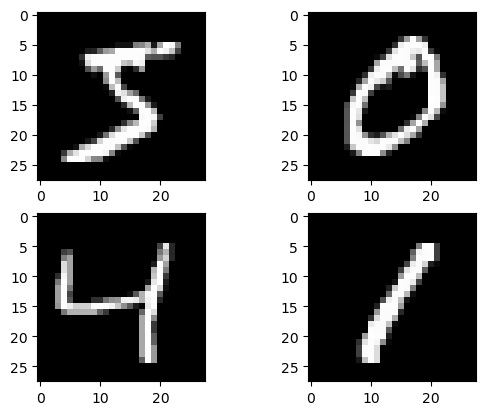

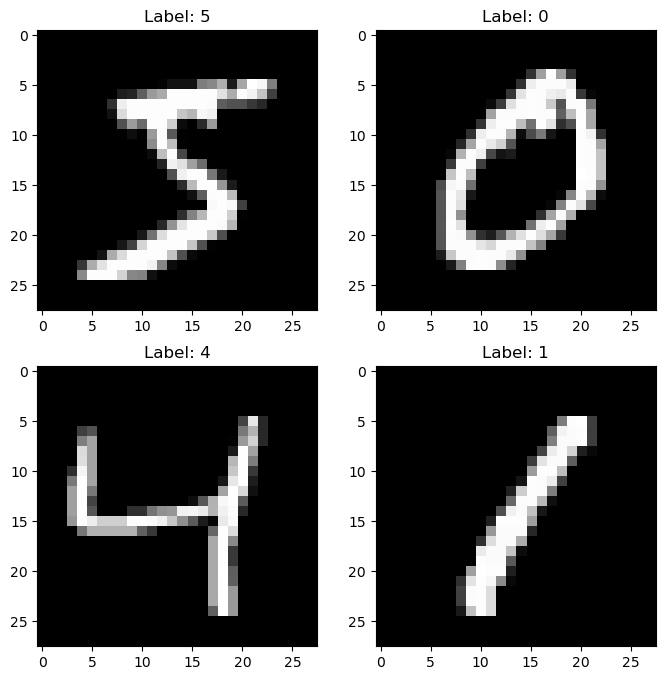



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                      

In [1]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import to_categorical

from keras.datasets import mnist
import matplotlib.pyplot as plt

from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

# load (downloaded if needed) the MNIST dataset
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

img_rows, img_cols = 28, 28

# You probably don’t need this part, (unless your ‘Tensorflow’ uses ‘theano’ as the backend engine)
# but just in case.
if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape) 


# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

# Plotting the first 4 images
plt.figure(figsize=(8, 8))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    plt.title("Label: {}".format(Y_train[i]))
plt.show() 

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

num_classes = 10

# one hot encode outputs
Y_train = to_categorical(Y_train, num_classes)
Y_test = to_categorical(Y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
# add batch normalization
model.add(Conv2D(64, (3, 3), activation='relu'))
# add batch normalization
model.add(MaxPooling2D(pool_size=(2, 2)))
# add dropout
model.add(Flatten())
model.add(Dense(128, activation='relu'))
# add dropout
model.add(Dense(num_classes, activation='softmax'))

# Displaying model summary
model.summary() 


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# you may change epochs and batch_size for performance
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, batch_size=200, verbose=2)

score = model.evaluate(X_test, Y_test, verbose=0)
#print('Test loss:', score[0])
print('Test accuracy:', score[1])


Shape of X_train: (60000, 28, 28, 1)
Shape of X_test: (10000, 28, 28, 1)


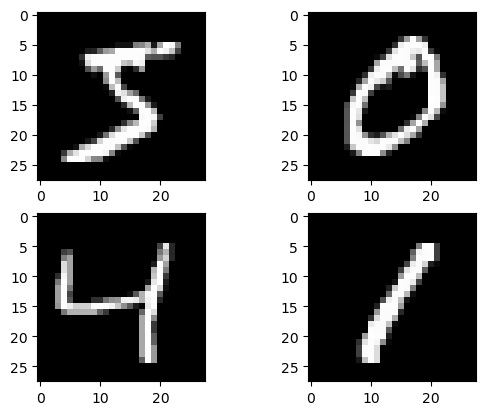

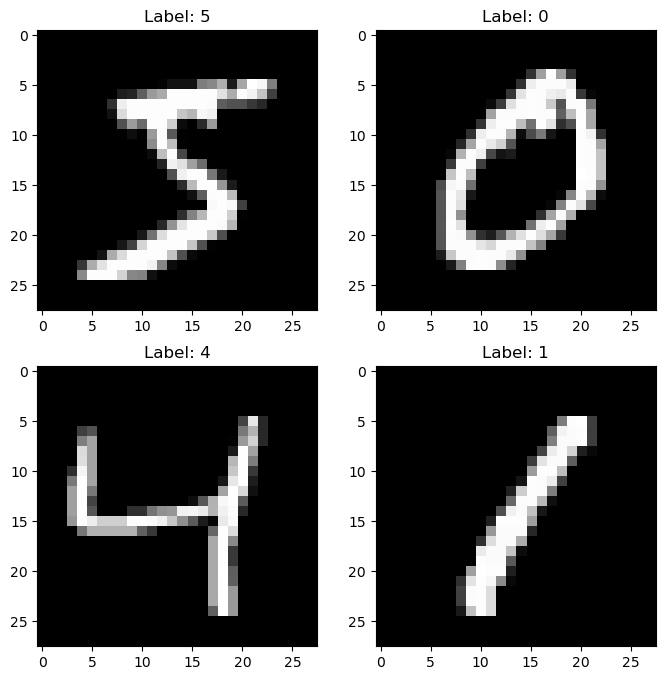

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 conv2d_5 (Conv2D)           (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 11, 11, 64)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 7744)              0         
                                                                 
 dense_63 (Dense)            (None, 128)               991360    
                                                                 
 dense_64 (Dense)            (None, 10)                1290      
                                                     

In [12]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import to_categorical

from keras.datasets import mnist
import matplotlib.pyplot as plt

from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

# load (downloaded if needed) the MNIST dataset
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

img_rows, img_cols = 28, 28

# You probably don’t need this part, (unless your ‘Tensorflow’ uses ‘theano’ as the backend engine)
# but just in case.
if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape) 


# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

# Plotting the first 4 images
plt.figure(figsize=(8, 8))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    plt.title("Label: {}".format(Y_train[i]))
plt.show() 

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

num_classes = 10

# one hot encode outputs
Y_train = to_categorical(Y_train, num_classes)
Y_test = to_categorical(Y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=input_shape))

# add batch normalization
model.add(Conv2D(64, (3, 3), activation='relu'))
# add batch normalization
model.add(MaxPooling2D(pool_size=(2, 2)))
# add dropout
model.add(Flatten())
model.add(Dense(128, activation='relu'))
# add dropout
model.add(Dense(num_classes, activation='softmax'))

# Displaying model summary
model.summary() 


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# you may change epochs and batch_size for performance
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, batch_size=200, verbose=2)

score = model.evaluate(X_test, Y_test, verbose=0)
#print('Test loss:', score[0])
print('Test accuracy:', score[1])


(7,7)

Shape of X_train: (60000, 28, 28, 1)
Shape of X_test: (10000, 28, 28, 1)


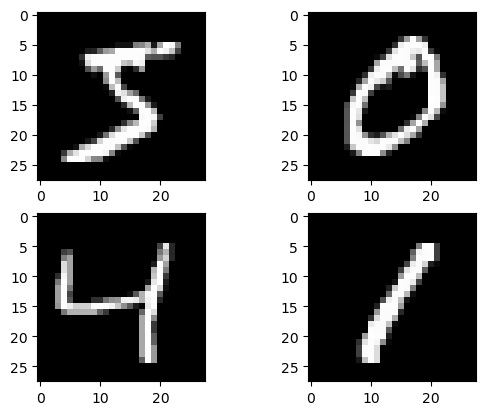

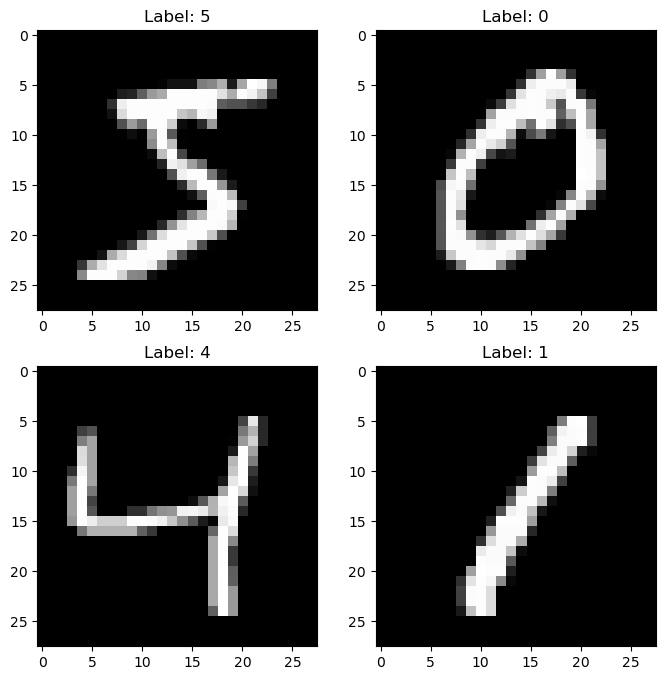

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 22, 22, 32)        1600      
                                                                 
 conv2d_7 (Conv2D)           (None, 20, 20, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 10, 10, 64)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 6400)              0         
                                                                 
 dense_65 (Dense)            (None, 128)               819328    
                                                                 
 dense_66 (Dense)            (None, 10)                1290      
                                                     

In [13]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import to_categorical

from keras.datasets import mnist
import matplotlib.pyplot as plt

from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

# load (downloaded if needed) the MNIST dataset
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

img_rows, img_cols = 28, 28

# You probably don’t need this part, (unless your ‘Tensorflow’ uses ‘theano’ as the backend engine)
# but just in case.
if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape) 


# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

# Plotting the first 4 images
plt.figure(figsize=(8, 8))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    plt.title("Label: {}".format(Y_train[i]))
plt.show() 

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

num_classes = 10

# one hot encode outputs
Y_train = to_categorical(Y_train, num_classes)
Y_test = to_categorical(Y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(7, 7), activation='relu', input_shape=input_shape))

# add batch normalization
model.add(Conv2D(64, (3, 3), activation='relu'))
# add batch normalization
model.add(MaxPooling2D(pool_size=(2, 2)))
# add dropout
model.add(Flatten())
model.add(Dense(128, activation='relu'))
# add dropout
model.add(Dense(num_classes, activation='softmax'))

# Displaying model summary
model.summary() 


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# you may change epochs and batch_size for performance
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, batch_size=200, verbose=2)

score = model.evaluate(X_test, Y_test, verbose=0)
#print('Test loss:', score[0])
print('Test accuracy:', score[1])


model.add(Dropout(0.25))
&

In [15]:
from keras.layers import Dropout

# define the model architecture
model = Sequential()

# Add the first convolutional layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))

# Add the second convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))

# Add the first MaxPooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add Dropout after the first MaxPooling layer
model.add(Dropout(0.25))

# Flatten the feature maps
model.add(Flatten())

# Add the first Dense hidden layer
model.add(Dense(128, activation='relu'))

# Add Dropout after the first Dense hidden layer
model.add(Dropout(0.5))

# Add the output layer
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, batch_size=200, verbose=2)

# Evaluate the model on the test set
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test accuracy:', score[1])


Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_11 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_4 (Flatten)         (None, 9216)              0         
                                                                 
 dense_69 (Dense)            (None, 128)               1179776   
                                                     

from tensorflow.keras import regularizers

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.05)))
